# Example 1

In [1]:
import jyrobot
import random

In [2]:
jyrobot.switch_backend("pil")

In [3]:
world = jyrobot.load()

Searching for jyrobot config files...
Directory: ./
    no files found
Directory: /home/dblank/jyrobot/jyrobot/worlds
    'duck-scribbler-no-walls'
    'two-scribblers-no-walls'
    'two-scribblers-one-wall'
    'two-scribblers'


In [4]:
world = jyrobot.load("two-scribblers")

Random seed initialized to: 6017917214805215748


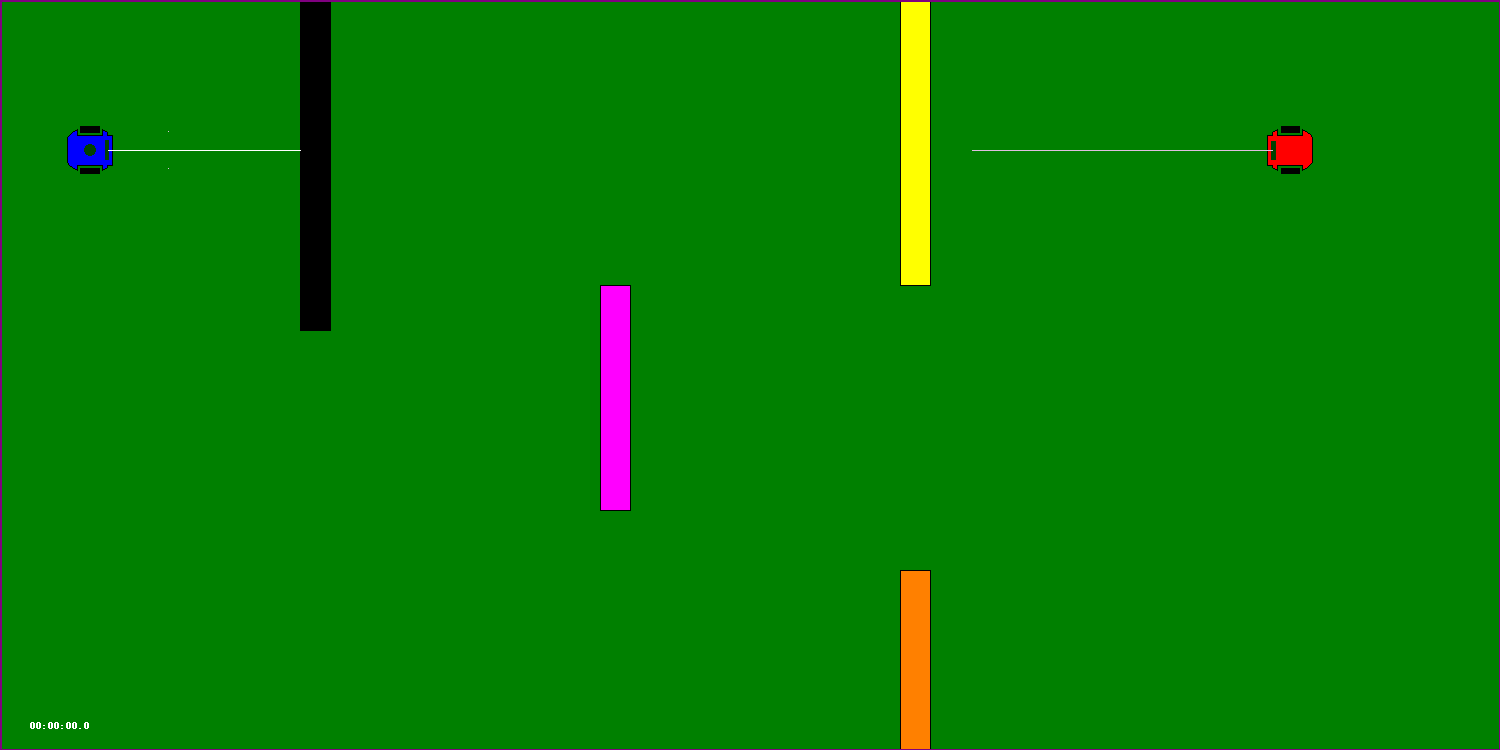

In [5]:
world.update()
world.take_picture()

In [6]:
world["red-1"]

<Robot(name='Red', position=430,50,3.14 v=0,0,0)>

In [7]:
world.watch("panel") # or "panel", "left", "right"
world.watch("inline")

TraitError: The 'value' trait of an Image instance expected a bytes object, not the Image <PIL.Image.Image image mode=RGBA size=1500x750 at 0x7F59986CE3A0>.

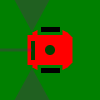

In [7]:
world.take_picture("red")

In [ ]:
world.info()

In [ ]:
world["red"]["camera"]

In [ ]:
world["red"]["camera"].take_picture()

In [ ]:
world[0].move(1, 0)
world[1].move(1, 0)

step = 0

def control(robot):
    global step
    if robot.stalled:
        robot.reverse()
        robot.turn(1 - random.random() * 2)
    if random.random() < .1:
        robot.turn(1 - random.random() * 2)
    #if step % 100 == 0:
    #    world.display(world.take_picture())
    step += 1

In [ ]:
world.run([control, control], show=True, real_time=True)

In [ ]:
world.run([control, control], show=True, real_time=False)

# Example 2

In [ ]:
import jyrobot
import time

In [ ]:
w = jyrobot.World(width=500, height=500, ground_color="white", seed=10)
w.watch("panel", "inline")

In [ ]:
for i in range(20):
    robot = jyrobot.Scribbler(color="blue", name="Scribby-%s" % i)
    sensor = jyrobot.Camera()
    robot.add_device(sensor)
    w.add_robot(robot)
w.draw()

In [ ]:
w.add_wall("black", 10, 0, 20, 50)

In [ ]:
from jyrobot.utils import Color
import random
for robot in w:
    robot.set_color( Color(
        255 * random.random(), 
        255 * random.random(), 
        255 * random.random(), 
   ))
w.draw()   

In [ ]:
%%time
pics = []
for robot in w:
    pic = robot["camera"].take_picture()
    pics.append(pic)

In [ ]:
w.display(*pics)

In [ ]:
%%time
pics = []
for i, robot in enumerate(w):
    pic = w.take_picture(i)
    pics.append(pic)

In [ ]:
w.display(*pics, background_color="black")

In [ ]:
for robot in w:
    robot.move(1,0)

In [ ]:
def control(world):
    for robot in world:
        if robot.stalled:
            robot.reverse()
        robot.turn(1 - random.random() * 2)

In [ ]:
w.run(control, show=True, real_time=False)

# Example 3

In [ ]:
import jyrobot as jr
import random

In [ ]:
w = jr.World(width=100, height=100)

In [ ]:
w.watch("inline", "panel") # or "panel", "left", "right"

In [ ]:
r = jr.Scribbler()

In [ ]:
w.add_robot(r)

In [ ]:
sensor = jr.RangeSensor()

In [ ]:
r.add_device(sensor)

In [ ]:
r.forward(1)

def control(world):
    for robot in world:
        if robot.stalled:
            robot.reverse()
        robot.turn(1 - random.random() * 2)

In [ ]:
w.seconds(10, control, show=True, real_time=True)

In [ ]:
w.seconds(10, control, show=True, real_time=False)

In [ ]:
w.seconds(10, control, show=False)

In [ ]:
r.set_pose(50, 50, 180)

In [ ]:
r.set_color("purple")

In [ ]:
w.take_picture()